    4) 구간분할, 이산화 그리고 선형모델, 트리 모델
        - 데이터를 잘 표현하는 방법은 데이터가 가진 의미와 어떤 모델을 이용하는지에 따라 다르다. 
        - 선형모델과 트리 기반 모델은 특성 표현 방식으로 인해 미치는 영향이 매우 크다. 

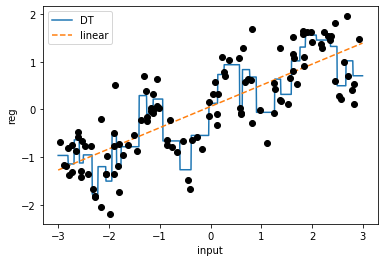

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import matplotlib.pyplot as plt
import numpy as np

X, y = mglearn.datasets.make_wave(n_samples = 120)
line = np.linspace(-3, 3, 1000, endpoint = False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X, y)
plt.plot(line, reg.predict(line), label ='DT')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line),'--',label = 'linear')

plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('reg')
plt.xlabel('input')
plt.legend(loc='best')

- 선형 모델은 선형 관계로만 모델링하여 특성이 하나일 땐 직선으로 표현
- DT는 훨씬 복잡한 모델 생성 
- 이러한 연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 중 하나는 한 특성을 여러 특성으로 나누는 구간분할(이산화)가 있다.
- 이 특성의 입력값 범위는 (-3~3), 10개로 되어 있다 가정하면 데이터 포인트가 어떤 구간에 속하는지 나타낼 수 있다. 
- 구간을 분할하는 방법에는 균일한 너비, 데이터의 분위 이용( 데이터가 많은 구간은 좁아진다 ) -> KBinsDiscretizer이용으로 구현 가능

In [6]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform')
kb.fit(X)
print('bin edges :',kb.bin_edges_)

bin edges : [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


- 위의 출력값은 각 구간의 경계 값이며, 한 번에 여러개 특서엥 적용가능하다. 
- bin_edges_에는 길이가 1인 배열이 출력된다. 
- transform 매서드로 데이터 포인트를 해당되는 구간으로 인코딩 가능하다. (구간에 원핫 인코딩 적용)
- 구간마다 하나의 새로운 특성이 생겨 희소 행렬을 만든다. -> 예제는 10개의 구간 지정으로 10차원 데이터로 변환

In [7]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [8]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

- 각 데이터 포인트가 어느 구간에 속하는지 1로 표현이 된다. ( 범주형 특성으로 변환)
- encdoe = 'ordinal'로 설정하면 인코딩 구간의 인덱스를 바로 계산 가능
- encode = 'onehot-dense'로 지정하여 원핫인코딩된 밀집 배열 만들어 특성 바로 출력 가능

In [10]:
kb=KBinsDiscretizer(n_bins =10, strategy='uniform',encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

Text(0.5, 0, 'input feature')

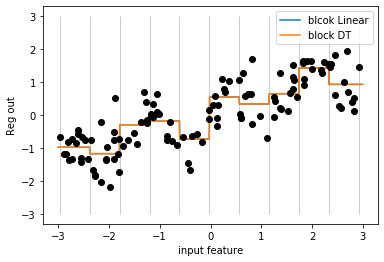

In [14]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = 'blcok Linear')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label ='block DT')

plt.plot(X[:,0],y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('Reg out')
plt.xlabel('input feature')

- 구간 선형 회귀, 결정 트리가 같은 예측을 만들어 실선이 완전히 겹쳐졌다. 
- 각 구간의 다른 값을 보유하여 선형모델이 훨씬 유연해졌다. 
- 반면에 결정트리는 덜 유연해졌다. 자유롭게 나눠 학습 가능한 결정트리는 구간 분할이 득이 되지 않는다. 

  ( 결정 트리는 데이터셋에서 예측을 위한 가장 좋은 구간을 학습한다 볼 수 있다, 구간분할은 특성마다 따로 해야하지만 결정 트리는 여러 특성 가능)

    5) 상호작용과 다항식
        - 특성을 풍부하게 나타내는 또 하나의 방법은 상호작용과 다항식 추가이다. 
        - 위의 선형모델은 각 구간에 대한 상수값을 학습했지만, 이 절편 외에도 기울기도 학습 가능하다. 
        - 기울기를 추가하는 방법은 구간 분할 데이터에 원래 특성을 다시 추가 하는 것이다. ( 위의 10차원에서 11차원으로 확장)

In [15]:
X_combined = np.hstack([X,X_binned])
print(X_combined.shape)

(120, 11)


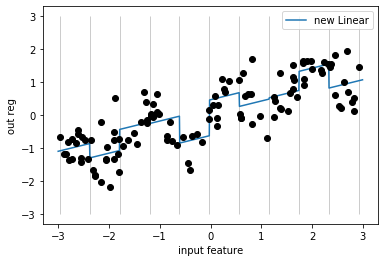

In [17]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label= 'new Linear')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth =1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('out reg')
plt.xlabel('input feature')
plt.plot(X[:,0],y, 'o',c='k')

- 이 모델에선 각 구간의 절편과 기울기 학습
- 학습 기울기는 양수이고 모든 구간에 걸쳐 동일 ( X 축 특성이 하나이기 때문 )
- 동일 기울기를 각 구간에 다른 기울기를 가지게 하기 위해 데이터 포인트가 있는 구간과 X 축사이의 상호작용 특성 추가

  ( 구간 특성과 원본 특성의 곱 )

In [18]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(120, 20)


- 원본 특성을 곲한 값을 더해 20개의 특성 보유 

  ( 구간에 대한 X축 특성의 복사본이라 생각 가능 - 구간 안에서는 원본, 다른 곳에서는 0)

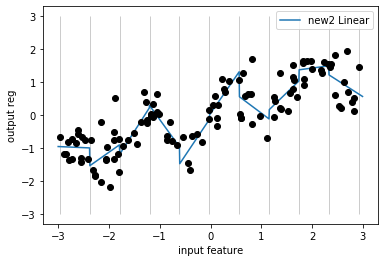

In [19]:
reg = LinearRegression().fit(X_product, y)

line_product=np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label='new2 Linear')

plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1, alpha=.2)

plt.plot(X[:,0],y, 'o',c='k')
plt.ylabel('output reg')
plt.xlabel('input feature')
plt.legend(loc='best')

- 이 모델은 각 구간의 절편, 기울기가 모두 다르다. 
- 구간 분할은 연속형 특성을 확장하는 방법중 하나이며, 원본 특성의 다항식 추가 방법도 있다.
  
  ( 특성 x 가 주어지면 x**2, x**3, x**4 등 시도 가능 ) -> preprocessing모듈의 PolynomialFeatures에 구현

In [21]:
from sklearn.preprocessing import PolynomialFeatures

#X ** 10 까지 고차항 추가 
#기본값인 'include_bias=True'는 절편에 해당하는 1인 특성 추가 

poly = PolynomialFeatures(degree=10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)

#10차원 이용으로 10개 특성 생성 

In [22]:
print('X_poly.shape', X_poly.shape)

X_poly.shape (120, 10)


In [23]:
print('X원소', X[:5])
print('X_poly 원소',X_poly[:5])

X원소 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


- 각 특성의 차수를 알려주는 get_feature_names 매서트 사용하여 특성의미 파악 가능

In [25]:
print('항 이름', poly.get_feature_names())

항 이름 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


- 다항식 특성을 선형 모델과 함께 이용하면 전형적인 다항회귀 모델이 된다. 

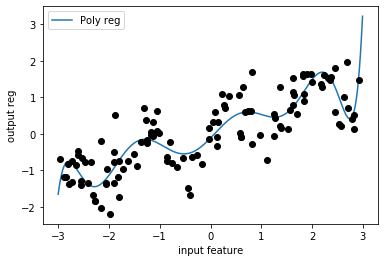

In [26]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='Poly reg')
plt.plot(X[:,0], y, 'o',c='k')
plt.ylabel('output reg')
plt.xlabel('input feature')
plt.legend(loc='best')

- 다항식 특성은 1차원 데이터셋에도 매우 부드러운 곡선 생성 ( 데이터 부족 영역에서는 민감하게 동작 )

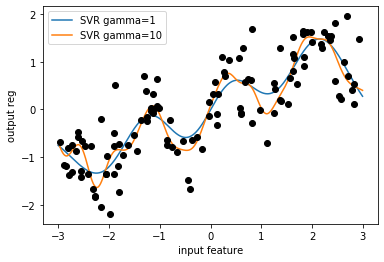

In [27]:
#비교 위한 SVM 모델 

from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma = gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label = 'SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0],y, 'o',c='k')
plt.ylabel('output reg')
plt.xlabel('input feature')
plt.legend(loc='best')

- 더 복잡한 모델인 커널 SVM을 이용해 특성 데이터 변환하지 않고 다항 회귀와 비슷한 복잡도를 가진 예측 생성

In [28]:
# 상호작용과 다항식을 위한 주택가격 데이터셋 이용하여 적용

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0 )

#스케일 조정
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc=scaler.fit_transform(X_test)

# 차수 2차로 다항식 특성 추출
poly = PolynomialFeatures(degree=2).fit(X_train_sc)
X_train_poly = poly.transform(X_train_sc)
X_test_poly = poly.transform(X_test_sc)
print('train shape',X_train.shape)
print('poly train shape',X_train_poly.shape)

train shape (379, 13)
poly train shape (379, 105)


- 13개의 특성에서 105개의 교차특성으로 확장
- 새로운 특성은 원래 특성의 제곱, 가능한 두 특성의 조합 모두 포함

  ( degree = 2 는 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱 획득 )
- 어떤 원본 특성이 곱해져 새로운 특성이 생성됬는지 정확한 관계를 확인하려면 get_feature_names 메서드 이용
- interaction_only = True 설정으로 거듭제곱 포함 항 모두 제외 가능

In [31]:
print('특성 이름', poly.get_feature_names())

특성 이름 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [32]:
#상호작용 특성 있는 데이터와 없는 데이터를 Ridge로 성능 비교

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_sc, y_train)
print('상호작용 X',ridge.score(X_test_sc, y_test))

ridge = Ridge().fit(X_train_poly, y_train)
print('상호작용 o',ridge.score(X_test_poly, y_test))

상호작용 X 0.576861144554004
상호작용 o 0.7411219642018811


- ridge같은 경우 상호작용이 성능을 높였다.

In [35]:
# 랜덤포레스트 같은 복잡한 모델 이용하여 상호작용 특성 여부에 따른 성능 abs비교

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_sc, y_train)
print('상호작용 x',rf.score(X_test_sc, y_test))

rf = RandomForestRegressor(n_estimators = 100, random_state = 0).fit(X_train_poly, y_train)
print('상호작용 o',rf.score(X_test_poly, y_test))

상호작용 x 0.7862053027925996
상호작용 o 0.7610776148859826


- 특성 추가 하지 않아도 랜덤 포레스트는 릿지의 성능과 맞먹는다 
- 오히려 상호작용과 다항식 추가하면 성능이 줄어든다. 

    6) 일변량 비선형 변환
        - 앞서 제곱, 세제곱 항 추가시 선형 회귀 모델에 도움이 되었다. 
        - log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용하다. 
        - 트리기반 모델은 특성의 순서에만 영향을 받지만 선형모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관
        - 특성과 타겟값 사이 비선형성 존재시, 모델 생성 어려움 
        - log, exp함수는 데이터 스케일을 변경해 선형 모델과 신경망 성능 향상에 도움
        - sin, cos 함수는 주기적 패턴이 들어있는 데이터 다룰 때 편리.
        - 대부분의 모델은 각 특성이 정규분포에 수렴할 때 최고의 성능을 낸다. 
          
          (즉 특성의 히스토 그램이 종모양과 비슷한 경우)
        - log, exp 함수는 이런 변환에 쉽고 효과적이다. ( 카운트 데이터 시 가장 효과적 )

In [36]:
#카운트 데이터 생성 예제

rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X= rnd.poisson(10*np.exp(X_org))
y= np.dot(X_org, w)
print(X[:10,0])

[ 56  81  25  20  27  18  12  21 109   7]


- 모두 양의 정수이지만 특정 패턴 발견 불가
- 값이 나타난 횟수를 세어 분포 확인 필요

In [37]:
#분포 확인
print('특성 출현 횟수',np.bincount(X[:,0]))

특성 출현 횟수 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'value')

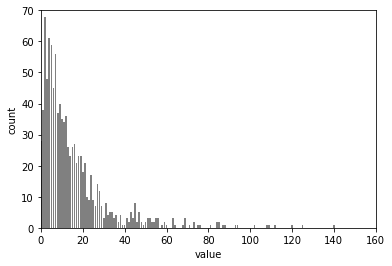

In [38]:
plt.xlim(0,160)
plt.ylim(0,70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)),bins, color = 'grey')
plt.ylabel('count')
plt.xlabel('value')

- X[:,1], X[:,2] 특성도 위와 같은 분포를 이룬다. 
- 이런 종류의 분포는(작은 수치가 많고, 큰 수치는 몇 안되는 ) 자주 나타나지만 선형 모델은 잘 처리 못한다.

In [39]:
#릿지에 위 데이터를 이용하여 회귀
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
score=Ridge().fit(X_train, y_train).score(X_test, y_test)
print('점수',score)

점수 0.6224186236310756


- R2점수가 낮아 X,y관계를 제대로 모델링 못했다 판단할 수 있다. 
- 이 경우, 로그 스케일로 변환하면 도움이 된다. 

  ( 데이터에 0이 있으면 log적용이 안되 log(X+1)이용

In [40]:
X_train_log= np.log(X_train+1)
X_test_log=np.log(X_test+1)

Text(0.5, 0, 'value')

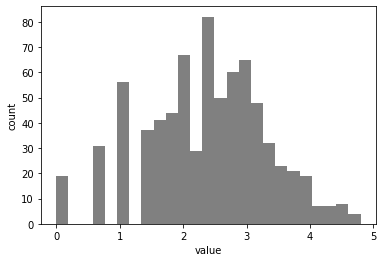

In [41]:
#변환 데이터 확인
plt.hist(X_train_log[:,0], bins=25, color='grey')
plt.ylabel('count')
plt.xlabel('value')

In [42]:
#릿지로 확인
score=Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print('점수', score)

점수 0.8749342372887815


- 데이터 셋과 모델의 조합에서 최적 변환 방법 탐색은 매우 어렵다. 
- 예제는 모든 특성이 같은 속성이지만, 일부 특성만 변환, 특성마다 다르게 변환하는 경우가 많다.
- 이런 변환은 트리기반 모델은 불필요하지만 선형 모델에서는 필수이다. (타겟값을 변환하는 경우도 있다. 카운트 예측)
- 구간분할, 다항식, 상호작용은 데이터가 주어진 모델의 성능에 큰 영향을 준다. 특히 선형, 나이브 베이즈 모델 같은 덜 복잡한 모델일 경우이다.
- 트리 기반 모델은 스스로 상호작용 탐색, 대부분의 경우 데이터 변환하지 않아도 된다. 
- SVM, 최근접 이웃, 신경망 모델은 성능 향상을 이뤄낼 수 있지만 선형 모델처럼 뚜렷하지는 않다.